# Loading Data to Geodataframe
Most of the basics for loading to gdf (e.g., from shapefile, GeoJSON, Geopackage, ESRI file geodatabase, etc.) are easily viewable through [Geopandas documentation](https://geopandas.org/en/stable/docs.html) and Fiona documenation.

## Loading a geodataframe from query results, so that GDF doesn't consume a ton of memory

### Specifying bounding box coordinates
Will only load features that are within a bounding box

[More info](https://geopandas.org/en/stable/docs/user_guide/io.html#reading-and-writing-files)

In [11]:
# Pre-querying using a bounding box
# https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html

import os
import geopandas as gpd
source_file = r'/Users/darrenconly/GIS/GeoJSON_samples/Sacramento_311_Calls_sample.geojson'

# (-121.470, 38.543, -121.449, 38.554) part of tahoe park and oak park
bound_box = (-121.470, 38.543, -121.449, 38.554) # (minx, miny, maxx, maxy)

gdf_bbox = gpd.read_file(source_file, bbox=bound_box)

<AxesSubplot:>

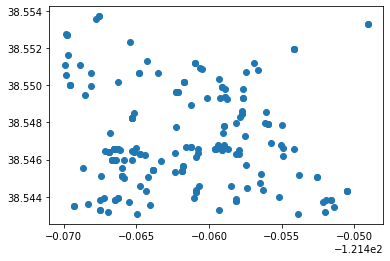

In [13]:
gdf.plot()

### Selecting subset based on other layer's geometry
Will only load features that intersect another features geometry.
E.g., within some distance of a line or point.

**Need to test if this is any portion intersecting, or if wholly within**

[More info](https://geopandas.org/en/stable/docs/user_guide/io.html#reading-and-writing-files)

In [20]:
# Pre-querying to only load features that are within a buffer distance of some selecting feature

selection_feature = r'/Users/darrenconly/GIS/GeoJSON_samples/line_stockton_bl_wgs84.geojson'
crs_sacog = "epsg:2226"
crs_source_data = "epsg:4236"
distance_feet = 500

# convert to feet so user can specify buffer distance in feet
gdf_selectfeat = gpd.read_file(selection_feature)
gdf_selectfeat['geometry_2226'] = gdf_selectfeat['geometry'].to_crs(crs_sacog)

# then convert back to CRS of input data's distance units
gs_selecnbuff = gdf_selectfeat['geometry_2226'].buffer(distance_feet)
gs_selenbuff2 = gs_selecnbuff.to_crs(crs_source_data)

# then do the selection
gdf_selectnresult = gpd.read_file(source_file, mask=gs_selenbuff2)

In [26]:
gdf_selectnresult.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   OBJECTID               54 non-null     int64   
 1   ReferenceNumber        54 non-null     object  
 2   CategoryLevel1         54 non-null     object  
 3   CategoryLevel2         54 non-null     object  
 4   CategoryName           54 non-null     object  
 5   CouncilDistrictNumber  54 non-null     object  
 6   SourceLevel1           54 non-null     object  
 7   Neighborhood           54 non-null     object  
 8   DateCreated            54 non-null     object  
 9   DateUpdated            54 non-null     object  
 10  DateClosed             43 non-null     object  
 11  CrossStreet            54 non-null     object  
 12  GlobalID               54 non-null     object  
 13  ZIP                    54 non-null     object  
 14  SFTicketID             54 non-null  

In [27]:
gdf_selectnresult.to_file("/Users/darrenconly/GIS/GeoJSON_samples/311calls_stocktonbuff.geojson", driver='GeoJSON')